# Exploratory Data Analysis

## Preparing for EDA

### Loading in json files and saving them as csv.gz files

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os, time, json
from sqlalchemy import create_engine

In [2]:
#Loading in the json files (should have attached this to loop during
# extraction, but doing it separately to avoid running loop again)
results_2000 = pd.read_json("Data/tmdb_api_results_2000.json")
results_2001 = pd.read_json("Data/tmdb_api_results_2001.json")

#Converting to csv.gz
results_2000.to_csv(f"Data/final_tmdb_data_2000.csv.gz", 
                    compression="gzip", index=False)

results_2001.to_csv(f"Data/final_tmdb_data_2001.csv.gz", 
                    compression="gzip", index=False)

In [3]:
results_2000.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0


In [4]:
results_2001.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,None,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",,11232.0,en,Kate & Leopold,...,2001-12-25,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1137.0


### Concatenate the data into 1 dataframe for the remainder of the analysis

In [5]:
# Code derivied from: https://www.geeksforgeeks.org/prevent-duplicated-columns-when-joining-two-pandas-dataframes/#:~:text=merge()%20function%20to%20join%20the%20left%20dataframe%20with%20the,duplicated%20in%20the%20merged%20dataset.
#to prevent duplicated columns
df = pd.merge(results_2000, results_2001, how='inner', left_index=True,
                     right_index=True, suffixes=('', '_remove'))

# remove the duplicate columns
df.drop([i for i in df.columns if 'remove' in i],
               axis=1, inplace=True)

In [6]:
df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0


In [7]:
# Dropping row 0 because there is no information available

df.drop(index=df.index[0], axis=0, inplace=True)
df.reset_index()
df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0
2,tt0113092,0.0,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 1 to 1203
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1203 non-null   object 
 1   adult                  1203 non-null   float64
 2   backdrop_path          634 non-null    object 
 3   belongs_to_collection  111 non-null    object 
 4   budget                 1203 non-null   float64
 5   genres                 1203 non-null   object 
 6   homepage               1203 non-null   object 
 7   id                     1203 non-null   float64
 8   original_language      1203 non-null   object 
 9   original_title         1203 non-null   object 
 10  overview               1203 non-null   object 
 11  popularity             1203 non-null   float64
 12  poster_path            1063 non-null   object 
 13  production_companies   1203 non-null   object 
 14  production_countries   1203 non-null   object 
 15  rele

# Some basic EDA

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [9]:
valid_info = df['revenue'] > 0
df[valid_info].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 4 to 1192
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                205 non-null    object 
 1   adult                  205 non-null    float64
 2   backdrop_path          194 non-null    object 
 3   belongs_to_collection  44 non-null     object 
 4   budget                 205 non-null    float64
 5   genres                 205 non-null    object 
 6   homepage               205 non-null    object 
 7   id                     205 non-null    float64
 8   original_language      205 non-null    object 
 9   original_title         205 non-null    object 
 10  overview               205 non-null    object 
 11  popularity             205 non-null    float64
 12  poster_path            204 non-null    object 
 13  production_companies   205 non-null    object 
 14  production_countries   205 non-null    object 
 15  relea

<AxesSubplot:>

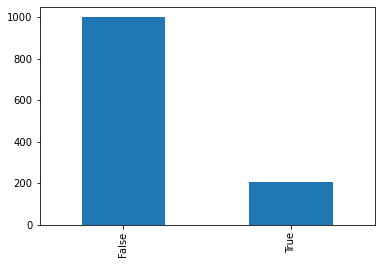

In [10]:
valid_info.value_counts().plot(kind='bar')

It looks like there are 205 entries that have a revenue higher than $0.

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [11]:
df['certification'].hist()

KeyError: 'certification'

I realized that the loops in my previous notebook did not add the certification for some reason, and I need some help troubleshooting that.

This also prevents being able to answer questions 3 and 4.

### What is the average revenue per certification category?

### What is the average budget per certification category?

# Deliverables

## Saving a final merged .csv.gz of all tmdb api data

In [ ]:
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)